In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image
from torchvision.transforms import v2
from torchvision import transforms
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import CustomClass
from func_file import train_model, test_model, collate_fn

데이터 출처<hr>
- https://www.kaggle.com/datasets/backalla/words-mnist
- https://tc11.cvc.uab.es/datasets/
- https://www.kaggle.com/datasets/hnthnt/jp-font-image-dataset-02?select=00000083.jpg
- https://www.kaggle.com/datasets/ngkinwang/iam-dataset
- https://www.kaggle.com/datasets/ravi02516/20-ocr-dataset
- https://www.kaggle.com/datasets/frlemarchand/synthetic-kmnist-pages?select=synthetic_kmnist_pages.csv

In [2]:
data_path = './data/archive/'

In [3]:
labels = pd.read_json(data_path+'v011_labels_small.json', typ='series')
labels

0.jpeg              BE
1.jpeg             the
2.jpeg              TO
3.jpeg            the+
4.png            Marks
               ...    
9995.jpeg      exactly
9996.png       Explain
9997.jpeg        COULD
9998.jpeg           NO
9999.jpeg    reproduce
Length: 10000, dtype: object

In [4]:
transformer = v2.Compose(transforms=
                                 [transforms.ToTensor(),
                                  v2.Resize(size=[64,128])
                                  ])

In [5]:
img_name_list = os.listdir(data_path+'dataset/v011_words_small')
img_name_list2 = os.listdir(data_path+'dataset/transformed')

In [8]:
img_list = []

In [9]:
for img_name in img_name_list+img_name_list2:
    try:
        img = Image.open(data_path+'dataset/v011_words_small/'+img_name)
    except FileNotFoundError as e:
        img = Image.open(data_path+'dataset/transformed/'+img_name)
    img_list.append(transformer(img).numpy())
    img.close()

In [10]:
type(img_list[1099])

numpy.ndarray

In [11]:
type(img_list)

list

In [13]:
img_list[1099].shape

(3, 64, 128)

In [14]:
len(img_list)

100000

In [16]:
img_TS = torch.tensor(np.array(img_list))

MemoryError: Unable to allocate 9.16 GiB for an array with shape (100000, 3, 64, 128) and data type float32

In [ ]:
img_TS.shape

torch.Size([10000, 3, 64, 128])

In [ ]:
img_TS[0]

tensor([[[0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.9014, 0.9014, 0.9014,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9947, 0.9947, 0.9947],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9922]],

        [[0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.9014, 0.9014, 0.9014,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9947, 0.9947, 0.9947],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 0.9922]],

        [[0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.8549, 0.8549, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         [0.9014, 0.9014, 0.9014,  ..., 1.0000, 1.0000, 1.

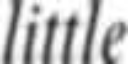

In [ ]:
tf = transforms.ToPILImage()
sample = tf(img_TS[12])
sample

In [ ]:
eng_only_vocab = CustomClass.Vocab()
eng_only_vocab.resetCode()

In [ ]:
for label in labels:
    if '—' in label:
        print(label)

:—
—
:—
:—
:—
:—
—
—
:—
—
—
era.—Elucidate
:—
:—
:—


In [ ]:
punc = set()
for label in labels.values:
    try:
        print(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))
    except:
        print(label)
        for l in label:
            if l not in eng_only_vocab.encoder.keys():
                punc.add(l)

[61, 64]
[53, 41, 38]
[79, 74]
[53, 41, 38, 12]
[72, 34, 51, 44, 52]
[90, 86]
[35, 54, 53]
[37, 48, 40, 52]
[56, 41, 34, 53]
[39, 42, 55, 38]
[41, 48, 54, 51, 52, 10]
[56, 34, 52]
[68, 79]
[62, 48, 54, 51, 53, 52]
[52, 53, 34, 53, 38, 46, 38, 47, 53]
[34, 52, 44, 38, 37]
[52, 53, 38, 34, 46, 35, 48, 34, 53]
[52, 41, 48, 51, 53]
[38, 34, 51, 45, 58]
[41, 42, 52]
[41, 34, 52]
[82, 74, 80, 71, 63]
[46, 42, 52, 53, 34, 44, 38, 52]
[48, 39, 53, 38, 47, 38, 51]
[53, 51, 34, 55, 38, 45, 42, 47, 40]
[53, 41, 38]
[82, 74, 77, 79, 67]
[56, 38, 51, 38]
[75, 51, 42, 36, 38]
[92]
[53, 41, 38]
[41, 42, 52]
[9, 42, 10]
[35, 38, 51, 58, 45, 52]
[53, 41, 38, 48, 51, 58]
[87, 88, 6]
[49, 48, 45, 42, 36, 58, 15]
[65, 51, 48, 46]
[53, 41, 38, 58]
[56, 34, 58]
[78, 34, 46, 49, 45, 38]
[52, 41, 38]
[62, 48, 47, 15]
[53, 48, 45, 37]
[49, 51, 48, 39, 42, 53]
[53, 41, 38]
[80, 73, 71, 74, 74, 78, 64, 73, 64, 63]
[53, 41, 48, 54, 40, 41]
[48, 54, 51]
[36, 41, 38, 36, 44]
you \
[56, 41, 42, 52, 53, 45, 38]
[34, 

In [ ]:
# 얍삽한 녀석들
punc

{' ', '©', '°', '—', '‘', '’', '“', '”'}

In [ ]:
# 얍삽한 녀석들 바꾸기
punc_dict = {' ':'<PAD>', '©':'<UNK>', '°':'<UNK>', '—':'-', '‘':'\'', '’':'\'', '“':'\"', '”':'\"'}

In [ ]:
for label in labels.values:
    try:
        print(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))
    except KeyError as e:
        label = (list(map(lambda x:punc_dict[x] if x in punc_dict.keys() else x, list(label))))
        print(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))

[61, 64]
[53, 41, 38]
[79, 74]
[53, 41, 38, 12]
[72, 34, 51, 44, 52]
[90, 86]
[35, 54, 53]
[37, 48, 40, 52]
[56, 41, 34, 53]
[39, 42, 55, 38]
[41, 48, 54, 51, 52, 10]
[56, 34, 52]
[68, 79]
[62, 48, 54, 51, 53, 52]
[52, 53, 34, 53, 38, 46, 38, 47, 53]
[34, 52, 44, 38, 37]
[52, 53, 38, 34, 46, 35, 48, 34, 53]
[52, 41, 48, 51, 53]
[38, 34, 51, 45, 58]
[41, 42, 52]
[41, 34, 52]
[82, 74, 80, 71, 63]
[46, 42, 52, 53, 34, 44, 38, 52]
[48, 39, 53, 38, 47, 38, 51]
[53, 51, 34, 55, 38, 45, 42, 47, 40]
[53, 41, 38]
[82, 74, 77, 79, 67]
[56, 38, 51, 38]
[75, 51, 42, 36, 38]
[92]
[53, 41, 38]
[41, 42, 52]
[9, 42, 10]
[35, 38, 51, 58, 45, 52]
[53, 41, 38, 48, 51, 58]
[87, 88, 6]
[49, 48, 45, 42, 36, 58, 15]
[65, 51, 48, 46]
[53, 41, 38, 58]
[56, 34, 58]
[78, 34, 46, 49, 45, 38]
[52, 41, 38]
[62, 48, 47, 15]
[53, 48, 45, 37]
[49, 51, 48, 39, 42, 53]
[53, 41, 38]
[80, 73, 71, 74, 74, 78, 64, 73, 64, 63]
[53, 41, 48, 54, 40, 41]
[48, 54, 51]
[36, 41, 38, 36, 44]
[58, 48, 54, 0, 25]
[56, 41, 42, 52, 53,

In [ ]:
encoded_label = []
for label in labels.values:
    try:
        encoded_label.append(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))
    except KeyError as e:
        label = (list(map(lambda x:punc_dict[x] if x in punc_dict.keys() else x, list(label))))
        encoded_label.append(list(map(lambda x:eng_only_vocab.AlToid(x), list(label))))

In [ ]:
DS1 = CustomClass.CustomDataset(img_TS, labels.values, eng_only_vocab)

In [ ]:
check_id = 1200
DS1[check_id][1], labels.values[check_id], len(DS1[check_id][1]), len(labels.values[check_id])

(array([62, 74, 73, 78, 68, 63, 64, 77, 60, 61, 71, 64]),
 'CONSIDERABLE',
 12,
 12)

In [ ]:
torch.random.manual_seed(100)
gen = torch.Generator().manual_seed(100)

In [ ]:
trainDS1, validDS1, testDS1 = random_split(DS1, [0.7, 0.15, 0.15], generator=gen)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
for d in trainDS1:
    print(d[1].shape)

(4,)
(3,)
(10,)
(2,)
(4,)
(2,)
(4,)
(3,)
(5,)
(4,)
(7,)
(8,)
(9,)
(6,)
(5,)
(9,)
(2,)
(3,)
(4,)
(7,)
(2,)
(4,)
(8,)
(6,)
(6,)
(6,)
(2,)
(3,)
(10,)
(7,)
(7,)
(12,)
(5,)
(4,)
(5,)
(7,)
(3,)
(2,)
(5,)
(6,)
(5,)
(5,)
(2,)
(2,)
(6,)
(7,)
(3,)
(4,)
(2,)
(2,)
(2,)
(8,)
(5,)
(2,)
(10,)
(4,)
(8,)
(3,)
(2,)
(5,)
(6,)
(2,)
(3,)
(4,)
(6,)
(2,)
(9,)
(5,)
(8,)
(6,)
(2,)
(8,)
(4,)
(3,)
(2,)
(3,)
(3,)
(3,)
(10,)
(4,)
(10,)
(9,)
(7,)
(10,)
(10,)
(4,)
(4,)
(3,)
(7,)
(6,)
(3,)
(4,)
(3,)
(7,)
(3,)
(3,)
(6,)
(8,)
(8,)
(6,)
(4,)
(5,)
(3,)
(3,)
(8,)
(3,)
(7,)
(2,)
(2,)
(2,)
(4,)
(5,)
(5,)
(5,)
(4,)
(3,)
(4,)
(6,)
(4,)
(2,)
(9,)
(2,)
(4,)
(3,)
(2,)
(2,)
(2,)
(4,)
(9,)
(4,)
(3,)
(2,)
(4,)
(7,)
(10,)
(4,)
(7,)
(7,)
(8,)
(5,)
(4,)
(5,)
(3,)
(2,)
(4,)
(3,)
(3,)
(2,)
(2,)
(2,)
(5,)
(2,)
(2,)
(9,)
(2,)
(10,)
(6,)
(2,)
(4,)
(3,)
(2,)
(4,)
(7,)
(9,)
(2,)
(4,)
(1,)
(7,)
(2,)
(4,)
(4,)
(2,)
(2,)
(8,)
(4,)
(5,)
(3,)
(5,)
(3,)
(4,)
(9,)
(6,)
(2,)
(3,)
(3,)
(2,)
(4,)
(7,)
(4,)
(3,)
(8,)
(8,)
(3,)
(2,)
(4,)
(5,)
(2,)
(11,)

In [ ]:
trainDS1[0], trainDS1[0][0].shape, trainDS1[0][1].shape

((tensor([[[0.8636, 0.8970, 0.8999,  ..., 0.5343, 0.5339, 0.6871],
           [0.8624, 0.8959, 0.8923,  ..., 0.4950, 0.4966, 0.6662],
           [0.8599, 0.8936, 0.8759,  ..., 0.4111, 0.4169, 0.6214],
           ...,
           [0.9681, 0.9648, 0.9545,  ..., 0.9699, 0.9685, 0.9556],
           [0.9738, 0.9698, 0.9573,  ..., 0.9757, 0.9699, 0.9556],
           [0.9765, 0.9721, 0.9586,  ..., 0.9784, 0.9705, 0.9556]],
  
          [[0.8636, 0.8970, 0.8999,  ..., 0.5343, 0.5339, 0.6871],
           [0.8624, 0.8959, 0.8923,  ..., 0.4950, 0.4966, 0.6662],
           [0.8599, 0.8936, 0.8759,  ..., 0.4111, 0.4169, 0.6214],
           ...,
           [0.9681, 0.9648, 0.9545,  ..., 0.9699, 0.9685, 0.9556],
           [0.9738, 0.9698, 0.9573,  ..., 0.9757, 0.9699, 0.9556],
           [0.9765, 0.9721, 0.9586,  ..., 0.9784, 0.9705, 0.9556]],
  
          [[0.8636, 0.8970, 0.8999,  ..., 0.5343, 0.5339, 0.6871],
           [0.8624, 0.8959, 0.8923,  ..., 0.4950, 0.4966, 0.6662],
           [0.8599, 0.

In [ ]:
BATCH_SIZE = 100
trainDL1 = DataLoader(trainDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
validDL1 = DataLoader(validDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
testDL1 = DataLoader(testDS1, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [ ]:
len(trainDL1)

70

In [ ]:
for f, t in trainDL1:
    print(f.shape, t.shape)
    print(f.dtype, t.dtype)
    print(f)
    print(t)
    break

torch.Size([100, 3, 64, 128]) torch.Size([100, 11])
torch.float32 torch.int32
tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9941, 0.9941, 0.9941,  ..., 0.7515, 0.7515, 0.7515],
          [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.8000, 0.8000],
          [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.8000, 0.8000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.9941, 0.9941, 0.9941,  ..., 0.7515, 0.7515, 0.7515],
          [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.8000, 0.8000],
          [1.0000, 1.0000, 1.0000,  ..., 0.8000, 0.8000, 0.8000]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CustomClass.CustomModel(3, len(eng_only_vocab)).to(device)
optim = torch.optim.Adam(model.parameters())
schd = torch.optim.lr_scheduler.ReduceLROnPlateau(optim)

In [ ]:
model

CustomModel(
  (CNN): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(

In [ ]:
result = train_model(model, optim, trainDL1, validDL1, device, schd=schd)

Proceeding......
Epoch [    1 /   100] ------
train cost = 0.5590610504150391, valid cost = 0.5559353232383728
Proceeding......
Epoch [    2 /   100] ------
train cost = 0.3761204481124878, valid cost = 0.3339439034461975
Proceeding......
Epoch [    3 /   100] ------
train cost = 0.4198471009731293, valid cost = 0.18443390727043152
Proceeding......
Epoch [    4 /   100] ------
train cost = 0.3799085021018982, valid cost = 0.47077056765556335
Proceeding......
Epoch [    5 /   100] ------
train cost = 0.2617306113243103, valid cost = 0.2890954613685608
Proceeding......
Epoch [    6 /   100] ------
train cost = 0.1998898983001709, valid cost = 0.09059841185808182
Proceeding......
Epoch [    7 /   100] ------
train cost = 0.25730234384536743, valid cost = 0.2697167992591858
Proceeding......
Epoch [    8 /   100] ------
train cost = 0.44211333990097046, valid cost = 0.3709144592285156
Proceeding......
Epoch [    9 /   100] ------
train cost = 0.31329506635665894, valid cost = 0.129587009549

In [ ]:
torch.save(model, './best_model100.pkl')

In [ ]:
testModel1 = torch.load('./best_model10.pkl')
testModel2 = torch.load('./best_model100.pkl')

In [ ]:
train_costs = [res.cpu().item() for res in result[0]]
valid_costs = [res.cpu().item() for res in result[1]]

plt.plot(train_costs)
plt.plot(valid_costs)
plt.legend(['train', 'valid'])
plt.grid(alpha=0.35)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

NameError: name 'result' is not defined

In [ ]:
test_model(testModel1, testDL1, device)

Proceeding...Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\anaconda\envs\For_DL\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\낙지들의왕\AppData\Local\Temp\ipykernel_18936\817883882.py", line 1, in <module>
    test_model(testModel1, testDL1, device)
  File "c:\Users\낙지들의왕\PycharmProjects\SERVICE_ML_TP\func_file.py", line 103, in test_model
  File "c:\anaconda\envs\For_DL\lib\site-packages\torch\nn\functional.py", line 2660, in ctc_loss
    return torch.ctc_loss(
RuntimeError: input_lengths must be of size batch_size

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\anaconda\envs\For_DL\lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "c:\anaconda\envs\For_DL\lib\site-packages\IPython\core\ultratb.py", line 1396, in structured_traceback
    return For